6030807821 Nattanun Sunawin HW clustering fire data

In [ ]:

import pandas as pd 
import datetime as dt
import numpy as np 

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Fire_Data.xlsx to Fire_Data.xlsx


In [ ]:
import io

fire_data = pd.read_excel(io.BytesIO(uploaded['Fire_Data.xlsx']))

In [ ]:
print(fire_data)

       OBJECTID  LATITUDE  LONGITUDE  ...  BRIGHT_TI5  FRP  TYPE
0             1  16.33696   98.70137  ...       303.4  5.8     0
1             2  16.48906   98.73961  ...       306.3  6.4     0
2             3  16.93571   99.06874  ...       305.0  3.8     0
3             4  16.54092   98.59869  ...       306.0  4.6     0
4             5  16.87473   98.63222  ...       303.9  3.1     0
...         ...       ...        ...  ...         ...  ...   ...
79229     79230  17.81812   97.74127  ...       294.4  7.2     0
79230     79231  17.77545   97.85637  ...       293.7  2.9     0
79231     79232  17.76847   97.79116  ...       293.7  2.2     0
79232     79233  17.77518   97.82606  ...       292.7  2.9     0
79233     79234  18.46766   97.94600  ...       290.9  1.0     0

[79234 rows x 15 columns]


In [ ]:
fire_data.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [ ]:
#Select and display date
date = fire_data['ACQ_DATE']
date

0       2019-12-01
1       2019-12-01
2       2019-12-01
3       2019-12-01
4       2019-12-01
           ...    
79229   2020-04-04
79230   2020-04-04
79231   2020-04-04
79232   2020-04-04
79233   2020-04-04
Name: ACQ_DATE, Length: 79234, dtype: datetime64[ns]

In [ ]:
#Select and display time
time =fire_data['ACQ_TIME']
hour = time//100
minute = time%100
time_frame = pd.DataFrame({'hour':hour, 'minute':minute})
time_frame

,hour,minute
0,6,35
1,6,35
2,6,35
3,6,35
4,6,35
...,...,...
79229,20,3
79230,20,3
79231,20,3
79232,20,3


In [ ]:
#Create new dataframe
df = pd.DataFrame({'year':fire_data['ACQ_DATE'].dt.year, 'month':fire_data['ACQ_DATE'].dt.month, 'day':fire_data['ACQ_DATE'].dt.day, 'hour':hour, 'minute':minute})
df

,year,month,day,hour,minute
0,2019,12,1,6,35
1,2019,12,1,6,35
2,2019,12,1,6,35
3,2019,12,1,6,35
4,2019,12,1,6,35
...,...,...,...,...,...
79229,2020,4,4,20,3
79230,2020,4,4,20,3
79231,2020,4,4,20,3
79232,2020,4,4,20,3


In [ ]:
#Create datetime
new_datetime = pd.to_datetime(df)
new_datetime

0       2019-12-01 06:35:00
1       2019-12-01 06:35:00
2       2019-12-01 06:35:00
3       2019-12-01 06:35:00
4       2019-12-01 06:35:00
                ...        
79229   2020-04-04 20:03:00
79230   2020-04-04 20:03:00
79231   2020-04-04 20:03:00
79232   2020-04-04 20:03:00
79233   2020-04-04 20:03:00
Length: 79234, dtype: datetime64[ns]

In [ ]:
fire_data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00


In [ ]:
fire_data['dif_time'] = fire_data['DATETIME'] - fire_data['DATETIME'].iloc[0]

In [ ]:
fire_data

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME,dif_time
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00


In [ ]:
fire_data['datetime_min'] = (fire_data['dif_time'].dt.total_seconds())/3600

In [ ]:
fire_data.head(800)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,DATETIME,dif_time,datetime_min
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,19.32708,100.02614,333.2,0.49,0.49,2019-12-08,605,N,VIIRS,n,1,298.3,2.2,0,2019-12-08 06:05:00,6 days 23:30:00,167.5
796,797,20.16325,99.85246,327.8,0.48,0.48,2019-12-08,605,N,VIIRS,n,1,295.5,2.4,0,2019-12-08 06:05:00,6 days 23:30:00,167.5
797,798,19.39145,100.14629,329.4,0.48,0.48,2019-12-08,605,N,VIIRS,n,1,297.9,3.8,0,2019-12-08 06:05:00,6 days 23:30:00,167.5
798,799,20.13434,100.05583,335.1,0.47,0.48,2019-12-08,605,N,VIIRS,n,1,295.7,3.3,0,2019-12-08 06:05:00,6 days 23:30:00,167.5


In [ ]:
DAYS = fire_data[["LATITUDE","LONGITUDE","datetime_min"]].head(800)

In [ ]:
DAYS

,LATITUDE,LONGITUDE,datetime_min
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
795,19.32708,100.02614,167.5
796,20.16325,99.85246,167.5
797,19.39145,100.14629,167.5
798,20.13434,100.05583,167.5


In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt

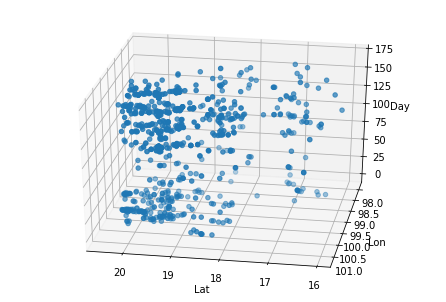

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
pp = Axes3D(fig)
pp.scatter(DAYS['LATITUDE'], DAYS['LONGITUDE'], DAYS['datetime_min'])
pp.set_xlabel('Lat')
pp.set_ylabel('Lon')
pp.set_zlabel('Day')
pp.view_init(azim=100)
plt.show()


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [ ]:

lats = np.array(DAYS.values.tolist())
lats

array([[ 16.33696,  98.70137,   0.     ],
       [ 16.48906,  98.73961,   0.     ],
       [ 16.93571,  99.06874,   0.     ],
       ...,
       [ 19.39145, 100.14629, 167.5    ],
       [ 20.13434, 100.05583, 167.5    ],
       [ 19.46438, 100.34093, 167.5    ]])

In [ ]:

db = DBSCAN(eps=2, min_samples=10).fit(lats)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
dblabels = db.labels_
n_clusters_ = len(set(dblabels)) - (1 if -1 in dblabels else 0)
n_noise_ = list(dblabels).count(-1)

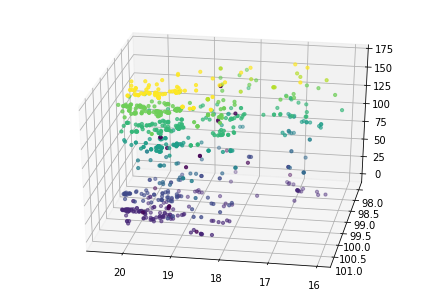

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lats[:,0], lats[:,1], lats[:,2], c=dblabels, s=10)
ax.view_init(azim=100)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(lats, dblabels)

0.8847978940984891

สรุปผล
   ใช้วิธี DBSCAN โดยกำหนดค่า eps = 2 และ min_sample = 10 โดยให้ eps มีค่าไม่มากนักเพื่อให้มีความสัมพันธ์กับค่าdifกับDAYS และใช้ค่าmin_sample = 10 โดยได้ค่า silhouette_score(lats, dblabels) = 0.8847978940984891 แสดงถึงแบบจำลองกระจายค่อนข้างดี เข้าใกล้1